# Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network (SRGAN)

In [1]:
import os
import matplotlib.pyplot as plt

from model.srgan import generator, discriminator
from train import SrganTrainer, SrganGeneratorTrainer
import cv2
import imageio
import numpy as np
import sewar
import pandas as pd

%matplotlib inline

In [2]:
## Load Directory Paths

def load_path(path):
    directories = []
    if os.path.isdir(path):
        print('directory path: ', path)
        directories.append(path)
    for elem in os.listdir(path): #check for nested dir within parent dir
        if os.path.isdir(os.path.join(path,elem)):
            print('inside nested dir')
            directories = directories + load_path(os.path.join(path,elem))
            directories.append(os.path.join(path,elem))
    print('directories: ', directories)
    return directories

In [3]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[os.path.join(d,f)] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return files

In [4]:
## Load Images

def load_data(directory, ext):
    files = load_data_from_dirs(load_path(directory), ext)
    return files

In [5]:
## Load HR Normal Images from directory

hr_0_imgs = load_data('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/', '.png')

directory path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/
directories:  ['D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/']
list of files:  811
list of files path:  811 file path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/10273_idx5_x1001_y1901_class0.png
Files Read:  811


In [6]:
hr_0_imgs = hr_0_imgs[:300]

In [7]:
for img in hr_0_imgs:
    if img.shape != (50,50,3):
        print(img.shape)

(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)


In [8]:
new_hr_0_imgs = []
for img in hr_0_imgs:
    if img.shape != (50,50,3):
        continue
    else:
        new_hr_0_imgs.append(img)

In [9]:
len(new_hr_0_imgs)

283

In [10]:
## Load HR Diseased Images from directory

hr_1_imgs = load_data('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/', '.png')

directory path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/
directories:  ['D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/']
list of files:  1211
list of files path:  1211 file path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/10273_idx5_x1001_y1001_class1.png
Files Read:  1211


In [11]:
hr_1_imgs = hr_1_imgs[:300]

In [12]:
for img in hr_1_imgs:
    if img.shape != (50,50,3):
        print(img.shape)

In [13]:
new_hr_1_imgs = hr_1_imgs[:200]

## Get Super Resolution for Normal Images

In [15]:
# Location of model weights
weights_dir = 'weights/srgan'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)

In [18]:
gan_generator = generator()
gan_generator.load_weights(weights_file('gan_generator.h5'))

In [29]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr):
    
    gan_sr = resolve_single(gan_generator, lr)
    
    plt.figure(figsize=(10, 10))
    
    images = [lr, gan_sr]
    titles = ['LR', 'SR (GAN)']
    positions = [1, 2]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(1, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

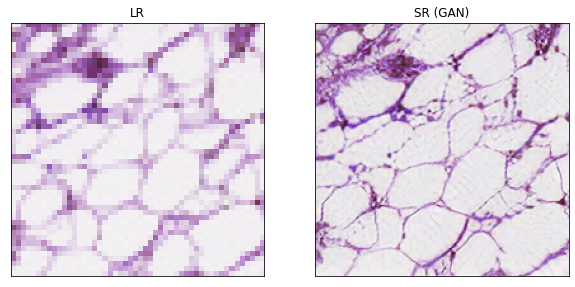

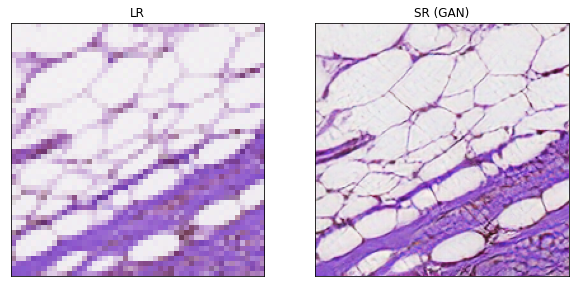

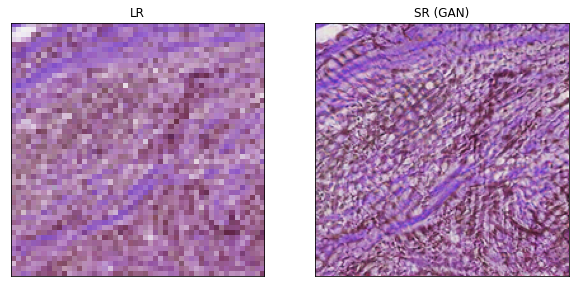

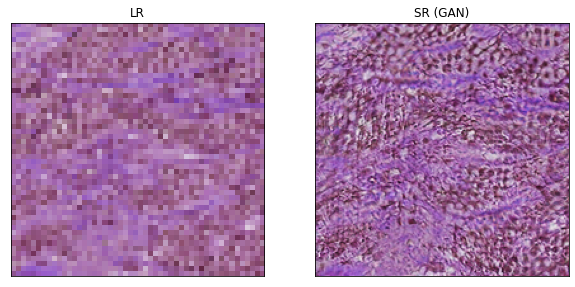

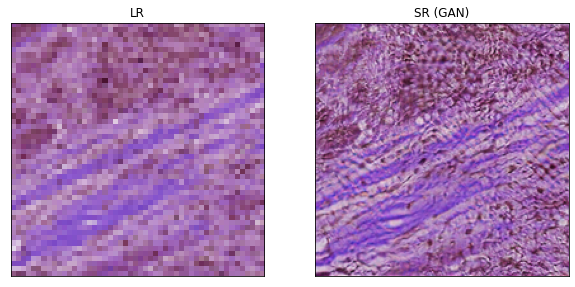

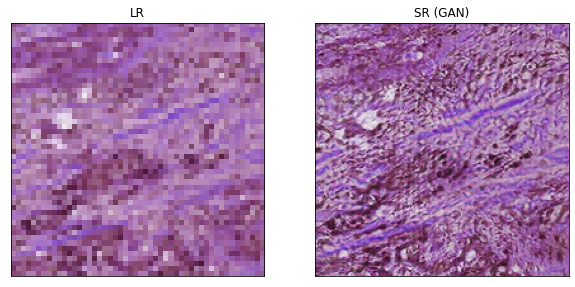

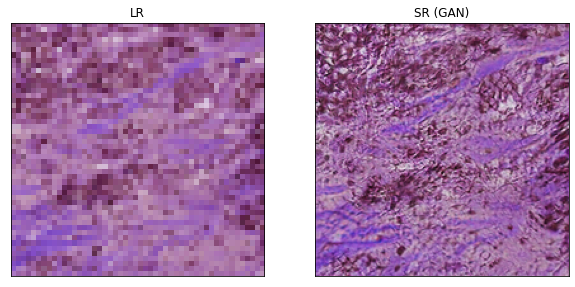

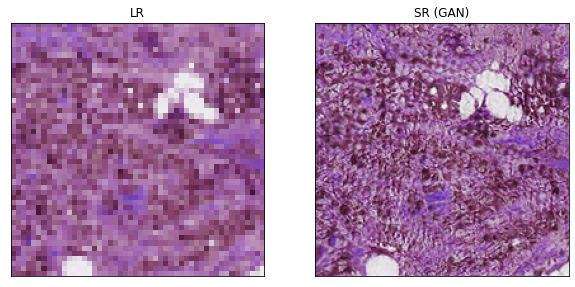

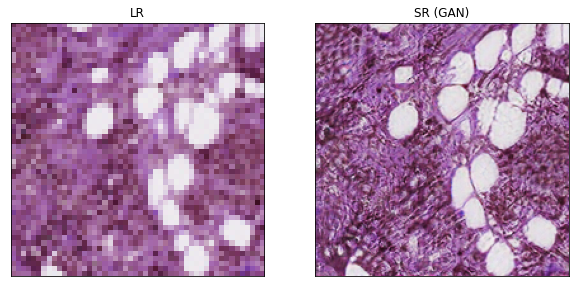

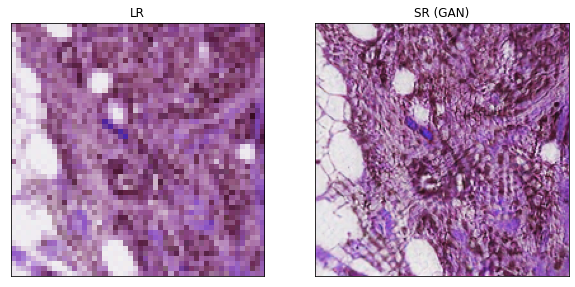

In [30]:
for img in new_hr_0_imgs[:10]:
    resolve_and_plot(img)

In [31]:
sr_0_imgs = []
for img in new_hr_0_imgs[:200]:
    gan_sr = resolve_single(gan_generator, img)
    sr_0_imgs.append(cv2.resize(np.asarray(gan_sr), (50, 50),
               interpolation = cv2.INTER_CUBIC))

In [32]:
for index, img in enumerate(new_hr_0_imgs):
    sr = resolve_single(gan_generator, img)
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/0/hr_imgs/HR_'+str(index+1)+'.png', np.asarray(img).astype(np.uint8))
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/0/sr_imgs/SR_'+str(index+1)+'.png', np.asarray(sr).astype(np.uint8))

## Get Super Resolution for Diseased Images

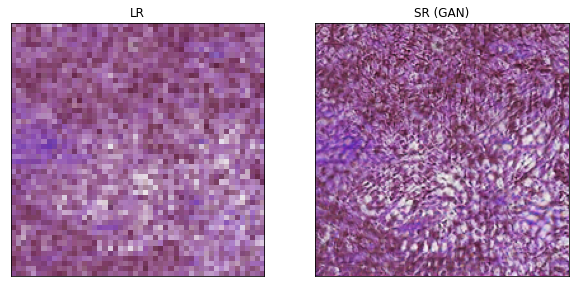

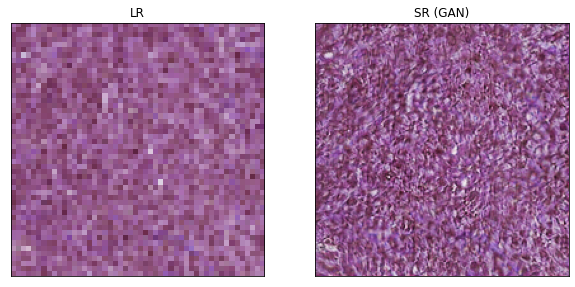

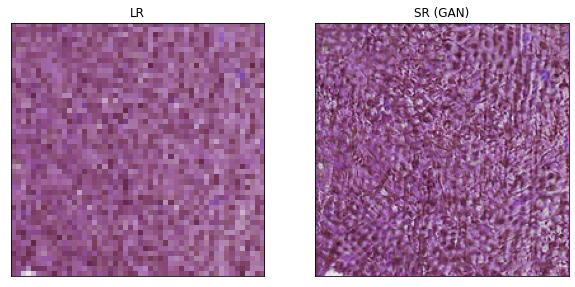

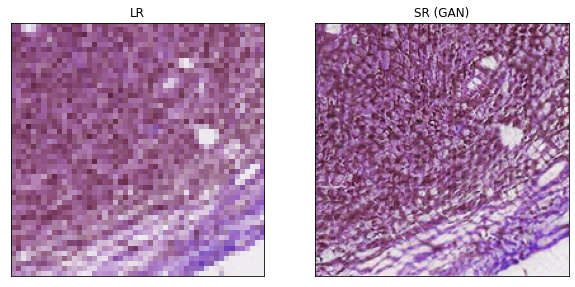

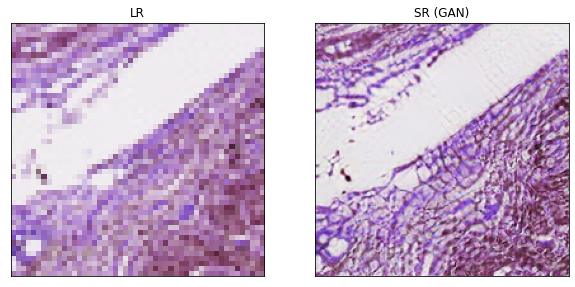

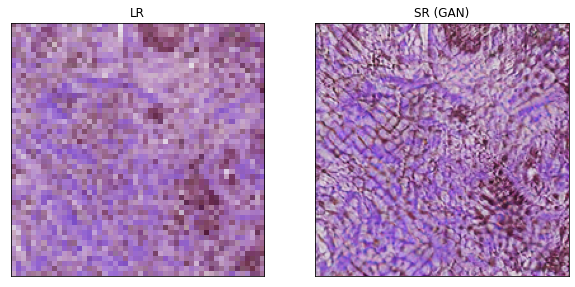

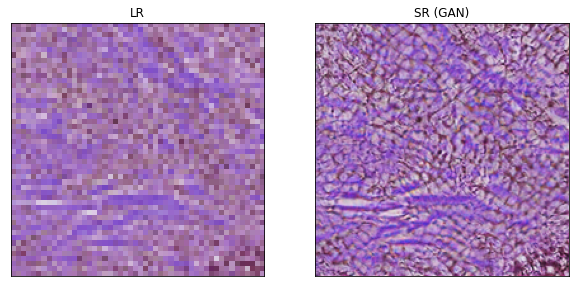

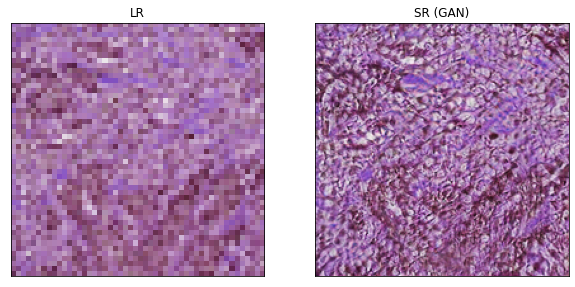

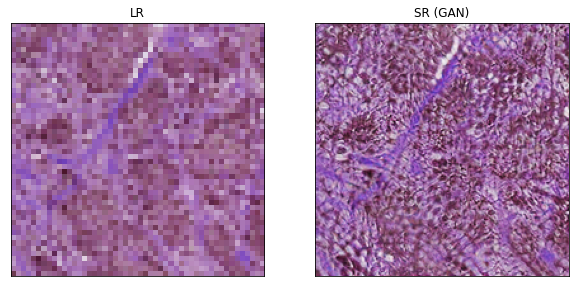

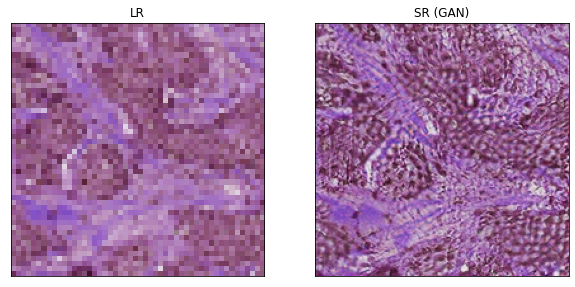

In [33]:
for img in hr_1_imgs[:10]:
    resolve_and_plot(img)

In [34]:
sr_1_imgs = []
for img in new_hr_0_imgs[:200]:
    sr = resolve_single(gan_generator, img)
    sr_1_imgs.append(cv2.resize(np.asarray(sr), (50, 50),
               interpolation = cv2.INTER_CUBIC))

In [36]:
for index, img in enumerate(hr_1_imgs):
    sr = resolve_single(gan_generator, img)
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/1/hr_imgs/HR_'+str(index+1)+'.png', np.asarray(img).astype(np.uint8))
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/1/sr_imgs/SR_'+str(index+1)+'.png', np.asarray(sr).astype(np.uint8))

## Metric Calculations for Normal Images

### SSIM Calculation

In [37]:
sewar.full_ref.ssim(new_hr_0_imgs[12],sr_0_imgs[12])[0]

0.8374244566359502

In [38]:
ssim_normal_arr = []
for i in range(200):
    ssim_normal_arr.append(sewar.full_ref.ssim(new_hr_0_imgs[i],sr_0_imgs[i])[0])
print(ssim_normal_arr[:10])

[0.8012052117005172, 0.8187498659310951, 0.6631037855805532, 0.6309891807580083, 0.699009310086494, 0.6977973392922263, 0.7033369958461342, 0.6988921728918402, 0.8016831165845799, 0.753414998493738]


In [39]:
ssim_normal_mean, ssim_normal_std = np.mean(ssim_normal_arr), np.std(ssim_normal_arr)
print(ssim_normal_mean, ssim_normal_std)

0.7626116477148759 0.06162882755393045


### Mean Absolute Error

In [40]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [41]:
print(MAE(new_hr_0_imgs[11], sr_0_imgs[11]))

0.0


In [42]:
mae_normal_arr = []
for i in range(200):
    mae_normal_arr.append(MAE(new_hr_0_imgs[i],sr_0_imgs[i]))
print(mae_normal_arr[:10])

[0.0004, 0.0012, 0.0, 0.0002666666666666667, 0.0, 0.0, 0.0, 0.00013333333333333334, 0.0006666666666666666, 0.0004]


In [43]:
mae_normal_mean, mae_normal_std = np.mean(mae_normal_arr), np.std(mae_normal_arr)
print(mae_normal_mean, mae_normal_std)

0.00027800000000000004 0.00037801293334723056


### Mean Percentage Error

In [44]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [45]:
print(MPE(new_hr_0_imgs[11], sr_0_imgs[11]))

0.0


In [46]:
mpe_normal_arr = []
for i in range(200):
    mpe_normal_arr.append(MPE(new_hr_0_imgs[i],sr_0_imgs[i]))
print(mpe_normal_arr[:10])

[0.04, 0.12, 0.0, 0.02666666666666667, 0.0, 0.0, 0.0, 0.013333333333333334, 0.06666666666666667, 0.04]


In [47]:
mpe_normal_mean, mpe_normal_std = np.mean(mpe_normal_arr), np.std(mpe_normal_arr)
print(mpe_normal_mean, mpe_normal_std)

0.0278 0.037801293334723055


### Mean Square Error

In [48]:
ans = sewar.full_ref.mse(new_hr_0_imgs[21],sr_0_imgs[21])
print(ans, type(ans))

769.6089333333333 <class 'numpy.float64'>


In [49]:
mse_normal_arr = []
for i in range(200):
    mse_normal_arr.append(sewar.full_ref.mse(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(mse_normal_arr[:10])

[437.9834666666667, 547.3193333333334, 884.848, 880.7508, 694.3896, 824.4656, 687.8013333333333, 866.4465333333334, 786.1552, 920.8798666666667]


In [50]:
mse_normal_mean, mse_normal_std = np.mean(mse_normal_arr), np.std(mse_normal_arr)
print("mean: ", mse_normal_mean, " std: ", mse_normal_std)

mean:  628.8999026666668  std:  216.2162822045427


### Root Mean Square Error

In [51]:
ans = sewar.full_ref.rmse(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

29.74639473953104 <class 'numpy.float64'>


In [52]:
rmse_normal_arr = []
for i in range(200):
    rmse_normal_arr.append(sewar.full_ref.rmse(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(rmse_normal_arr[:10])

[20.928054536116505, 23.39485698467365, 29.74639473953104, 29.677445981755238, 26.351273214021365, 28.71350901579255, 26.225966775951907, 29.435463871550137, 28.03845930146662, 30.346002482479744]


In [53]:
rmse_normal_mean, rmse_normal_std = np.mean(rmse_normal_arr), np.std(rmse_normal_arr)
print("mean: ", rmse_normal_mean, " std: ", rmse_normal_std)

mean:  24.662960368653476  std:  4.542938313569159


### PSNR

In [54]:
ans = sewar.full_ref.psnr(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

18.66211687267024 <class 'numpy.float64'>


In [55]:
psnr_normal_arr = []
for i in range(200):
    psnr_normal_arr.append(sewar.full_ref.psnr(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images
print(psnr_normal_arr[:10])

[21.716226441331187, 20.748395715748728, 18.66211687267024, 18.68227314537846, 19.71477153158627, 18.969078210108968, 19.756173474820205, 18.753385924270024, 19.175720694723054, 18.488773828390748]


In [56]:
psnr_normal_mean, psnr_normal_std = np.mean(psnr_normal_arr), np.std(psnr_normal_arr)
print("mean: ", psnr_normal_mean, " std: ", psnr_normal_std)

mean:  20.456552248863023  std:  1.7664330329728803


### Multi-Scale Structural Similarity Index (MS-SSIM)

In [57]:
ans = sewar.full_ref.msssim(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

(0.8448079142723139+0j) <class 'numpy.complex128'>


In [58]:
msssim_normal_arr = []
for i in range(200):
    msssim_normal_arr.append(sewar.full_ref.msssim(new_hr_0_imgs[i],sr_0_imgs[i]).real)
    
## Display Results for starting 10 images
print(msssim_normal_arr[:10])

[0.9612623211081305, 0.9631599621823186, 0.8448079142723139, 0.8171032577223146, 0.8681532863155812, 0.9147629840725331, 0.8779513399159746, 0.8658667448386173, 0.9495936713395838, 0.907698586790333]


In [59]:
msssim_normal_mean, msssim_normal_std = np.mean(msssim_normal_arr), np.std(msssim_normal_arr)
print("mean: ", msssim_normal_mean,  " std: ", msssim_normal_std)

mean:  0.9276433875137505  std:  0.042330209848927276


### Spatial Corelation Coefficient (SCC)

In [60]:
ans = sewar.full_ref.scc(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

0.7788876568570299 <class 'numpy.float64'>


In [61]:
scc_normal_arr = []
for i in range(200):
    scc_normal_arr.append(sewar.full_ref.scc(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(scc_normal_arr[:10])

[0.7821706477543859, 0.7964131731100419, 0.7788876568570299, 0.758293911426575, 0.7781046214266447, 0.753515278861807, 0.7451975260045178, 0.7606817856533385, 0.7724838532272376, 0.7720116125194493]


In [62]:
scc_normal_mean, scc_normal_std = np.mean(scc_normal_arr), np.std(scc_normal_arr)
print("mean: ", scc_normal_mean,  " std: ", scc_normal_std)

mean:  0.7447583572503573  std:  0.06644593204228003


### Pixel Based Visual Information Fidelity (vif-p)

In [63]:
ans = sewar.full_ref.vifp(new_hr_0_imgs[21],sr_0_imgs[21])
print(ans, type(ans))

0.17727288001324734 <class 'numpy.float64'>


In [64]:
vifp_normal_arr = []
for i in range(200):
    vifp_normal_arr.append(sewar.full_ref.vifp(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images
print(vifp_normal_arr[:10])

[0.26381779963572044, 0.2608353160965415, 0.1740422844247251, 0.16639275722315353, 0.20010068040662862, 0.21015431628806003, 0.19197025933112544, 0.18454179937469825, 0.2522255038066076, 0.20398584683697996]


In [65]:
vifp_normal_mean, vifp_normal_std = np.mean(vifp_normal_arr), np.std(vifp_normal_arr)
print("mean: ", vifp_normal_mean,  " std: ", vifp_normal_std)

mean:  0.2431848383745023  std:  0.056458636589748715


## Visualizing Metrics for Normal Images

In [66]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP  Images/visualizations/normal/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

### ErrorBar Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

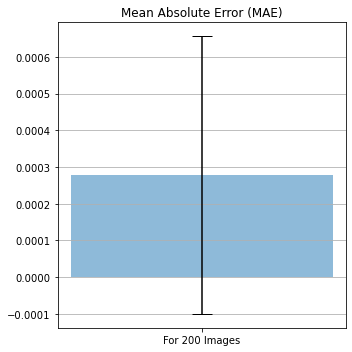

In [67]:
error_barplot(mae_normal_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

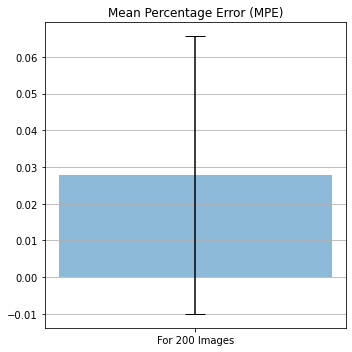

In [68]:
error_barplot(mpe_normal_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

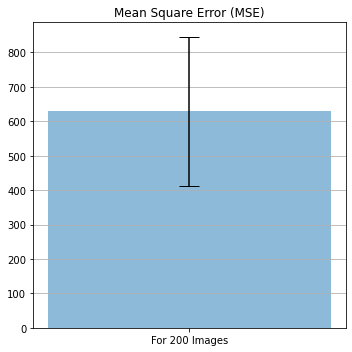

In [69]:
error_barplot(mse_normal_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

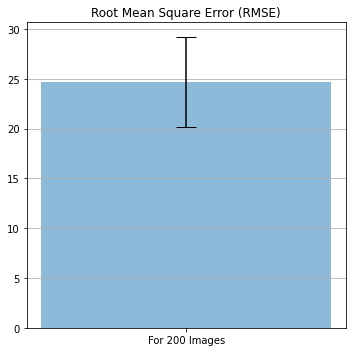

In [70]:
error_barplot(rmse_normal_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

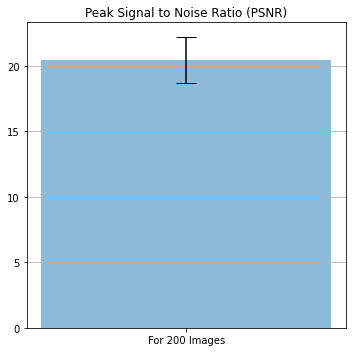

In [71]:
error_barplot(psnr_normal_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

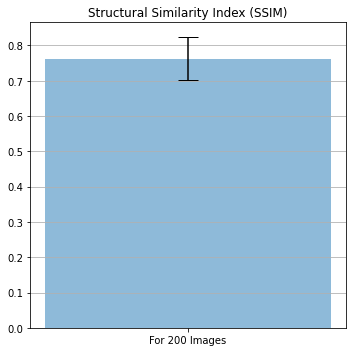

In [72]:
error_barplot(ssim_normal_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

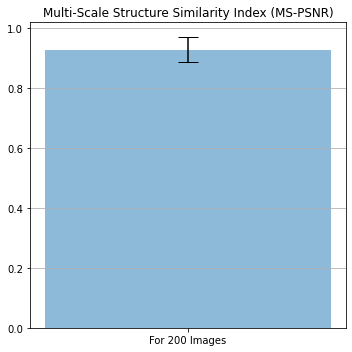

In [73]:
error_barplot(msssim_normal_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

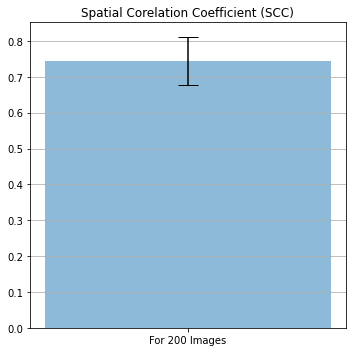

In [74]:
error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

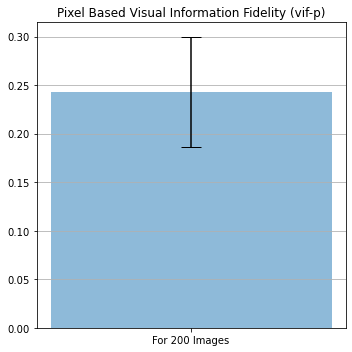

In [75]:
error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

### Scatter Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

In [76]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,8)})

In [77]:
metric_dict = {'Images': [i for i in range(1,201)],
            'MAE' : mae_normal_arr,
            'MPE' : mpe_normal_arr,
            'MSE' : mse_normal_arr,
            'RMSE' : rmse_normal_arr,
            'PSNR' : psnr_normal_arr,
            'SSIM' : ssim_normal_arr,
            'MSSSIM' : msssim_normal_arr,
            'SCC' : scc_normal_arr,
            'VIFP' : vifp_normal_arr
         }
metric_df = pd.DataFrame(metric_dict)

In [78]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/normal/scatter/{file_name}.png")

In [79]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/normal/regression/{file_name}.png")

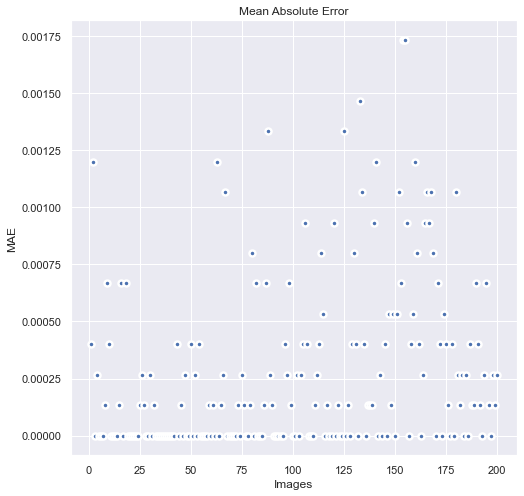

In [80]:
getScatterPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

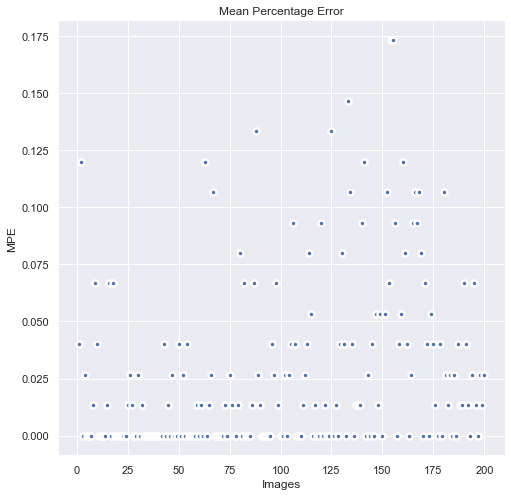

In [81]:
getScatterPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

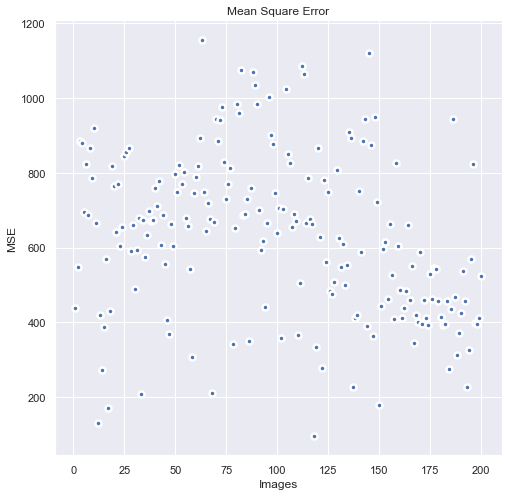

In [82]:
getScatterPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

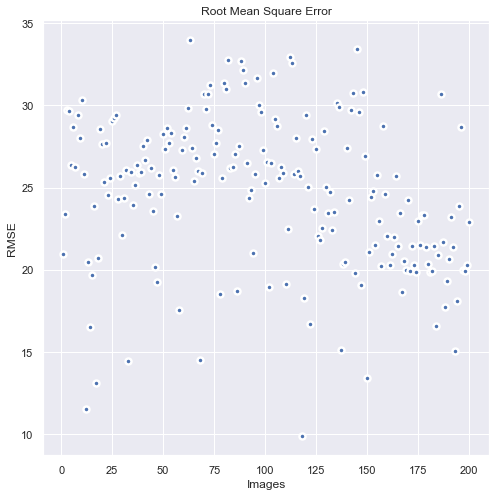

In [83]:
getScatterPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

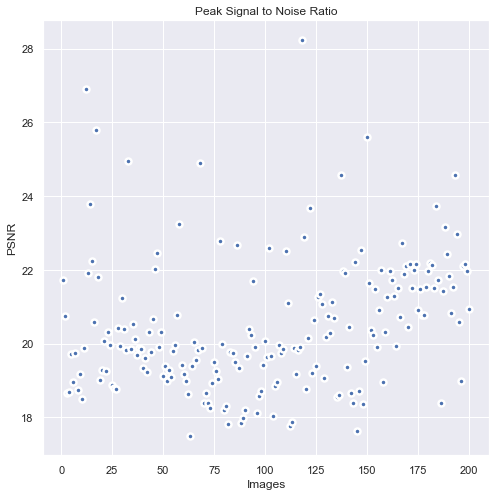

In [84]:
getScatterPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

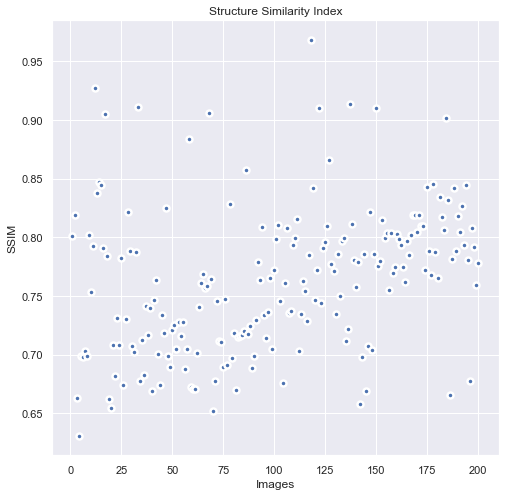

In [85]:
getScatterPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

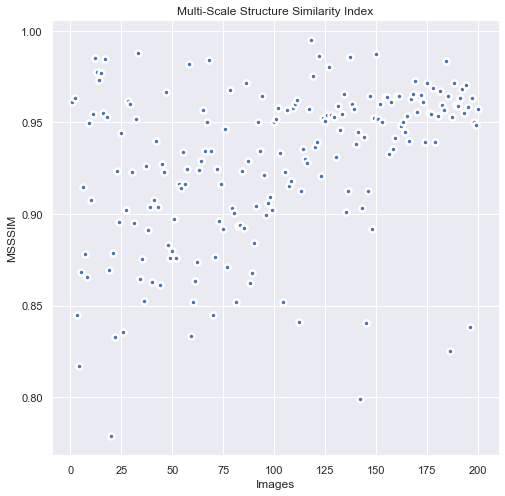

In [86]:
getScatterPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

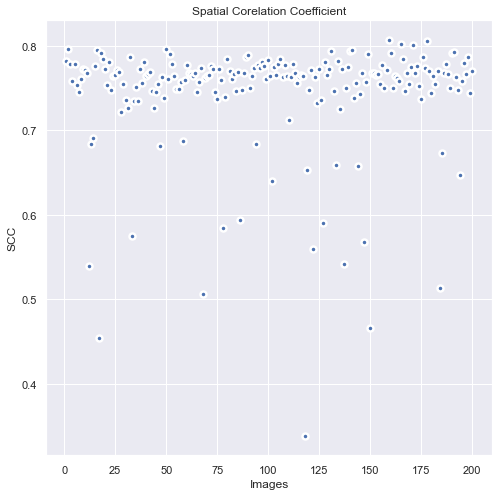

In [87]:
getScatterPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

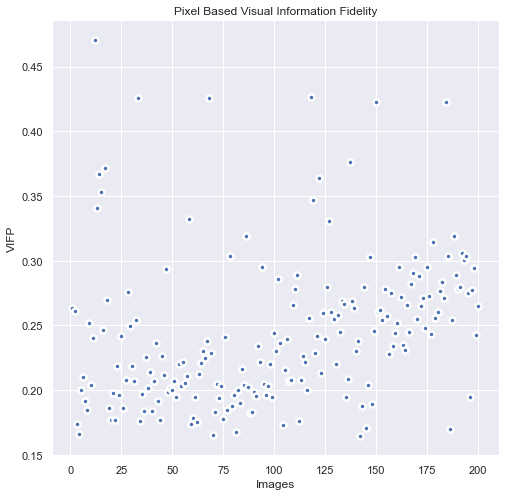

In [88]:
getScatterPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

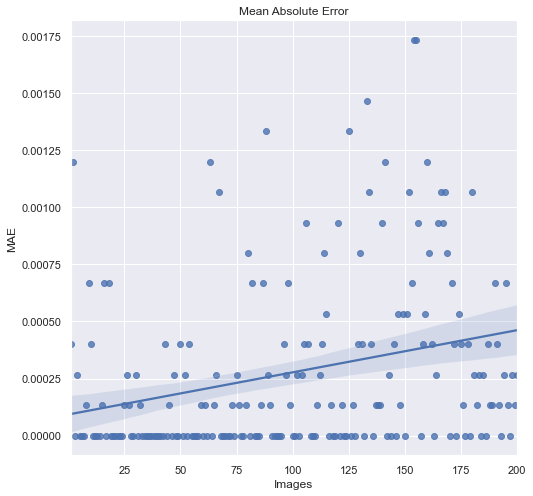

In [89]:
RegPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

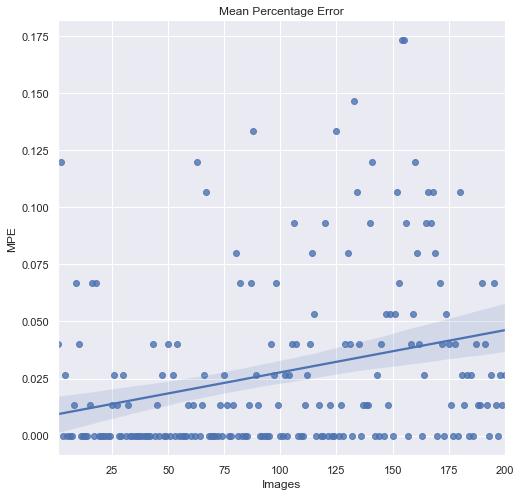

In [90]:
RegPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

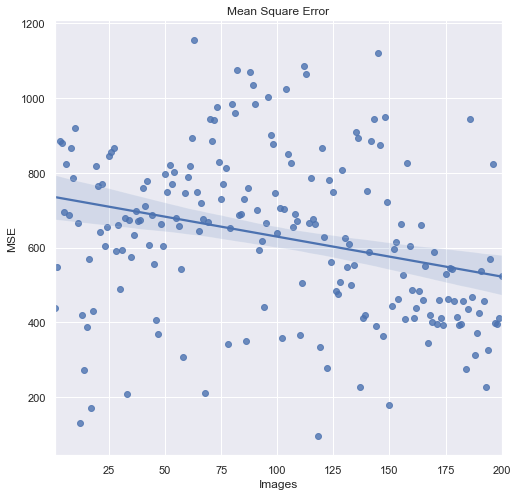

In [91]:
RegPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

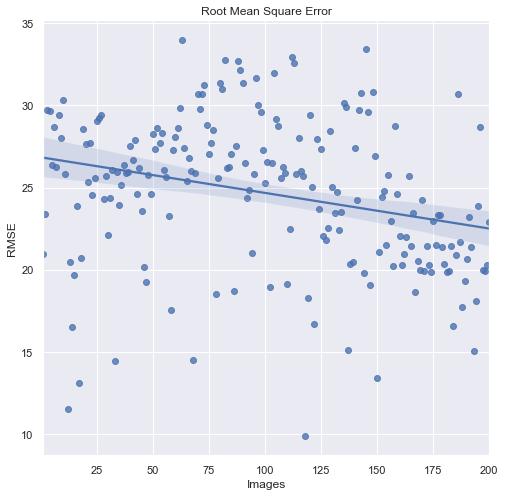

In [92]:
RegPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

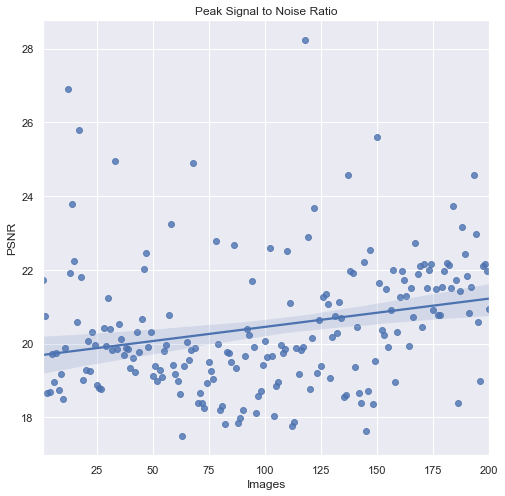

In [93]:
RegPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

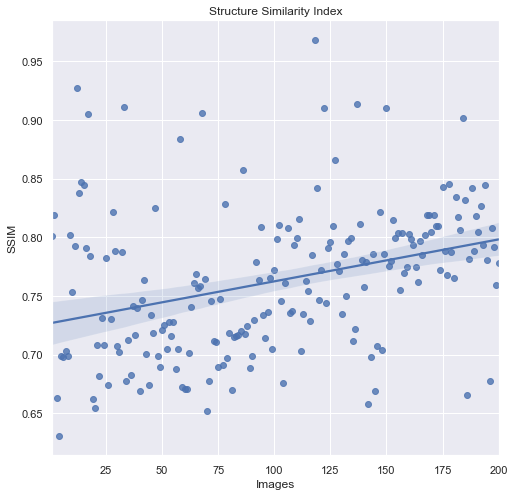

In [94]:
RegPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

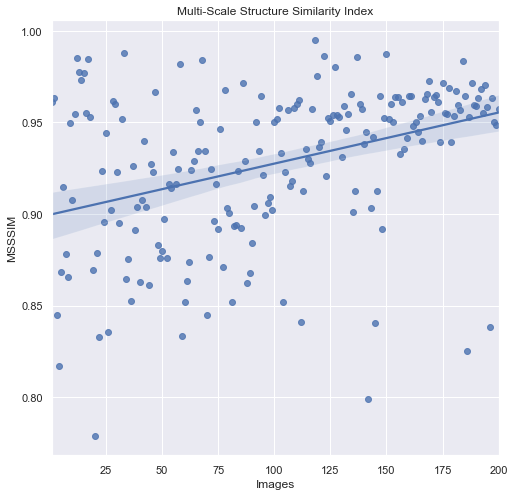

In [95]:
RegPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

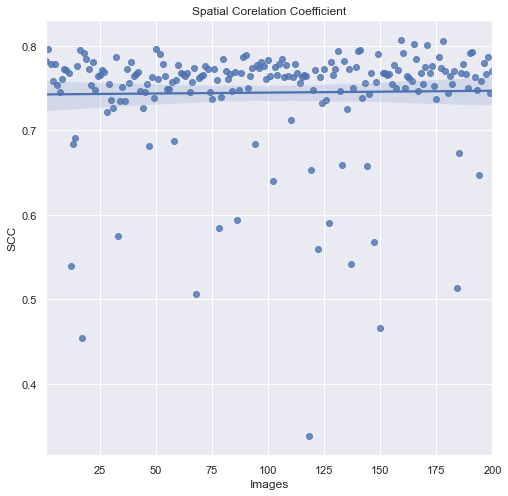

In [96]:
RegPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

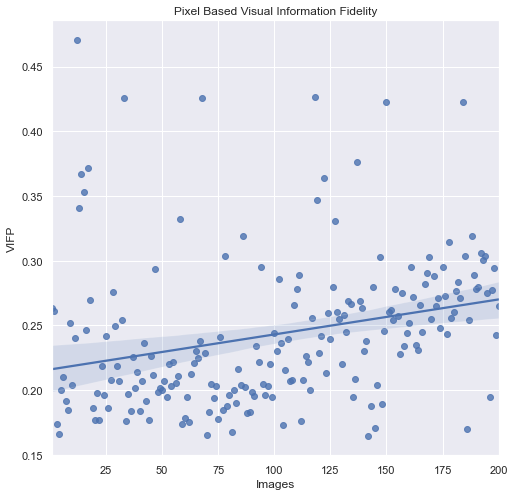

In [97]:
RegPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

## Metric Calculations for Diseased Images

### SSIM

In [98]:
sewar.full_ref.ssim(new_hr_1_imgs[12],sr_1_imgs[12])[0]

0.06537358957745966

In [99]:
ssim_cancer_arr = []
for i in range(200):
    ssim_cancer_arr.append(sewar.full_ref.ssim(new_hr_1_imgs[i],sr_1_imgs[i])[0])
print(ssim_cancer_arr[:10])

[0.02346727947719784, 0.011109880765441576, 0.014342009546376063, 0.05483211551630109, 0.021538160317586996, 0.01947873252151639, 0.015732492979272376, 0.01504201723153715, 0.020026644340547187, -0.030777030310344]


In [100]:
ssim_cancer_mean, ssim_cancer_std = np.mean(ssim_cancer_arr), np.std(ssim_cancer_arr)
print(ssim_cancer_mean, ssim_cancer_std)

0.035326392632865515 0.021130540195005758


### Mean Absolute Error (MAE)

In [101]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [102]:
MAE(new_hr_1_imgs[12],sr_1_imgs[12])

0.0

In [103]:
mae_cancer_arr = []
for i in range(200):
    mae_cancer_arr.append(MAE(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mae_cancer_arr[:10])

[0.0004, 0.0012, 0.0, 0.0002666666666666667, 0.0, 0.0, 0.0, 0.00013333333333333334, 0.0006666666666666666, 0.0004]


In [104]:
mae_cancer_mean, mae_cancer_std = np.mean(mae_cancer_arr), np.std(mae_cancer_arr)
print(mae_cancer_mean, mae_cancer_std)

0.00027800000000000004 0.00037801293334723056


### Mean Percentage Error (MPE)

In [105]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [106]:
MPE(new_hr_1_imgs[12],sr_1_imgs[12])

0.0

In [107]:
mpe_cancer_arr = []
for i in range(200):
    mpe_cancer_arr.append(MPE(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mpe_cancer_arr[:10])

[0.04, 0.12, 0.0, 0.02666666666666667, 0.0, 0.0, 0.0, 0.013333333333333334, 0.06666666666666667, 0.04]


In [108]:
mpe_cancer_mean, mpe_cancer_std = np.mean(mpe_cancer_arr), np.std(mpe_cancer_arr)
print(mpe_cancer_mean, mpe_cancer_std)

0.0278 0.037801293334723055


### Mean Square Error

In [109]:
ans = sewar.full_ref.mse(new_hr_1_imgs[21],sr_1_imgs[21])
print(ans, type(ans))

1946.4922666666666 <class 'numpy.float64'>


In [110]:
mse_cancer_arr = []
for i in range(200):
    mse_cancer_arr.append(sewar.full_ref.mse(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mse_cancer_arr[:10])

[8143.541466666667, 7830.9668, 2257.782133333333, 2871.4381333333336, 6233.824933333333, 2929.402666666667, 2525.9556, 3074.0394666666666, 3688.3665333333333, 4167.462]


In [111]:
mse_cancer_mean, mse_cancer_std = np.mean(mse_cancer_arr), np.std(mse_cancer_arr)
print(mse_cancer_mean, mse_cancer_std)

5184.923336666667 2339.6083872251047


### Root Mean Square Error

In [112]:
ans = sewar.full_ref.rmse(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

47.516124982297676 <class 'numpy.float64'>


In [113]:
rmse_cancer_arr = []
for i in range(200):
    rmse_cancer_arr.append(sewar.full_ref.rmse(new_hr_1_imgs[i],sr_1_imgs[i]))
print(rmse_cancer_arr[:10])

[90.24157282908287, 88.49274998552141, 47.516124982297676, 53.585801602041315, 78.95457512603897, 54.1239564949447, 50.25888578152126, 55.44402101820057, 60.73192351089609, 64.55588276834266]


In [114]:
rmse_cancer_mean, rmse_cancer_std = np.mean(rmse_cancer_arr), np.std(rmse_cancer_arr)
print(rmse_cancer_mean, rmse_cancer_std)

70.15482228622226 16.224187087655213


### PSNR

In [115]:
ans = sewar.full_ref.psnr(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

14.593983288839723 <class 'numpy.float64'>


In [116]:
psnr_cancer_arr = []
for i in range(200):
    psnr_cancer_arr.append(sewar.full_ref.psnr(new_hr_1_imgs[i],sr_1_imgs[i]))
print(psnr_cancer_arr[:10])

[9.02267048736562, 9.192649781221768, 14.593983288839723, 13.549808972562595, 10.18325759198325, 13.4630128830141, 14.106546483954181, 13.253709218923678, 12.462462881028122, 11.932087123596016]


In [117]:
psnr_cancer_mean, psnr_cancer_std = np.mean(psnr_cancer_arr), np.std(psnr_cancer_arr)
print(psnr_cancer_mean, psnr_cancer_std)

11.446255632045508 2.0394211773950395


### Multi-Scale Structure Similarity Index MS-SSIM

In [118]:
ans = sewar.full_ref.msssim(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

(0.284796689177105+0j) <class 'numpy.complex128'>


In [119]:
msssim_cancer_arr = []
for i in range(200):
    msssim_cancer_arr.append(sewar.full_ref.msssim(new_hr_1_imgs[i],sr_1_imgs[i]).real)
print(msssim_cancer_arr[:10])

[0.345998567427062, 0.23950003030274225, 0.284796689177105, 0.38324052833235506, 0.1275567885478577, 0.31710609081239793, 0.32181153661311873, 0.2246848082063626, 0.06705940628530148, 0.0556594468932419]


In [120]:
msssim_cancer_mean, msssim_cancer_std = np.mean(msssim_cancer_arr), np.std(msssim_cancer_arr)
print(msssim_cancer_mean, msssim_cancer_std)

0.23227605749878893 0.10678432169521826


### Spatial Corelation Coefficient (SCC)

In [121]:
ans = sewar.full_ref.scc(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

-0.011221627185321706 <class 'numpy.float64'>


In [122]:
scc_cancer_arr = []
for i in range(200):
    scc_cancer_arr.append(sewar.full_ref.scc(new_hr_1_imgs[i],sr_1_imgs[i]))
print(scc_cancer_arr[:10])

[-0.02793615284005727, -0.0382250540002379, -0.011221627185321706, 0.020976828462367425, -0.006361136387252629, -0.018294805125463946, 0.004620094201327517, -0.005299253509522063, 0.003841691891253536, 0.00991037349802878]


In [123]:
scc_cancer_mean, scc_cancer_std = np.mean(scc_cancer_arr), np.std(scc_cancer_arr)
print(scc_cancer_mean, scc_cancer_std)

0.002817769947521152 0.02020436824511281


### Pixel Based Visual Information Fidelity (vif-p)

In [124]:
ans = sewar.full_ref.vifp(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

0.0010415585985958037 <class 'numpy.float64'>


In [125]:
vifp_cancer_arr = []
for i in range(200):
    vifp_cancer_arr.append(sewar.full_ref.vifp(new_hr_1_imgs[i],sr_1_imgs[i]))
print(vifp_cancer_arr[:10])

[0.00450903434965914, 0.0007887153299204088, 0.0010415585985958037, 0.0026619537851542362, 0.001843271723678233, 0.0023171949344706, 0.0025441707431706055, 0.0023392726033807753, 0.0008904353289277026, 0.0018325567430716738]


In [126]:
vifp_cancer_mean, vifp_cancer_std = np.mean(vifp_cancer_arr), np.std(vifp_cancer_arr)
print(vifp_cancer_mean, vifp_cancer_std)

0.002743165464830985 0.0018330274547799087


### Visualizing Error Barplots for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [127]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP  Images/visualizations/diseased/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

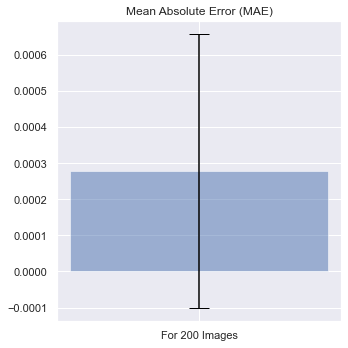

In [128]:
error_barplot(mae_cancer_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

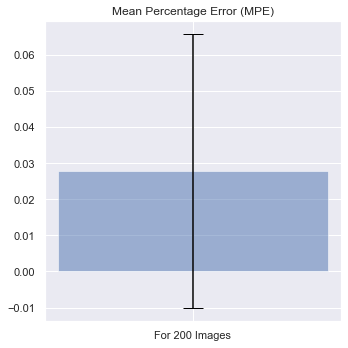

In [129]:
error_barplot(mpe_cancer_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

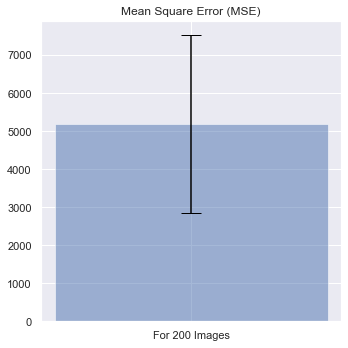

In [130]:
error_barplot(mse_cancer_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

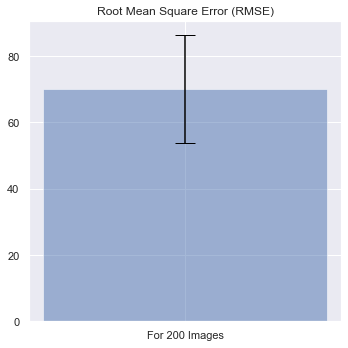

In [131]:
error_barplot(rmse_cancer_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

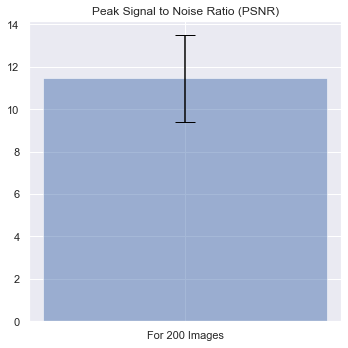

In [132]:
error_barplot(psnr_cancer_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

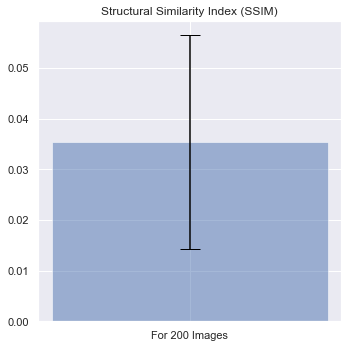

In [133]:
error_barplot(ssim_cancer_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

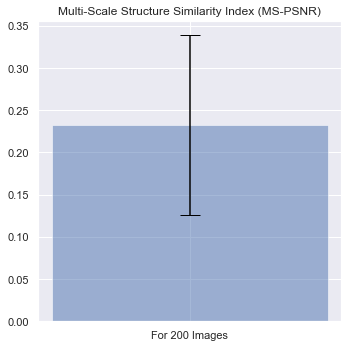

In [134]:
error_barplot(msssim_cancer_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

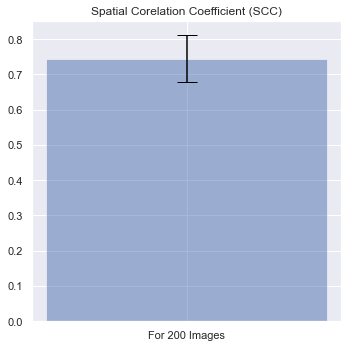

In [135]:
error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

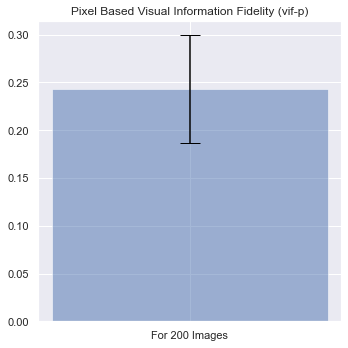

In [136]:
error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

### Scatter Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [137]:
metric_dict_cancer = {'Images': [i for i in range(1,201)],
            'MAE' : mae_cancer_arr,
            'MPE' : mpe_cancer_arr,
            'MSE' : mse_cancer_arr,
            'RMSE' : rmse_cancer_arr,
            'PSNR' : psnr_cancer_arr,
            'SSIM' : ssim_cancer_arr,
            'MSSSIM' : msssim_cancer_arr,
            'SCC' : scc_cancer_arr,
            'VIFP' : vifp_cancer_arr
         }
metric_df_cancer = pd.DataFrame(metric_dict_cancer)

In [138]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/diseased/scatter/{file_name}.png")

In [139]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/diseased/regression/{file_name}.png")

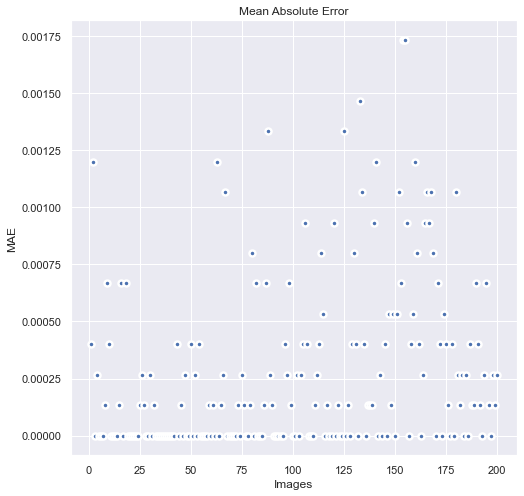

In [140]:
getScatterPlot(metric_df_cancer.MAE, metric_df_cancer, 'Mean Absolute Error', 'mae_scatter')

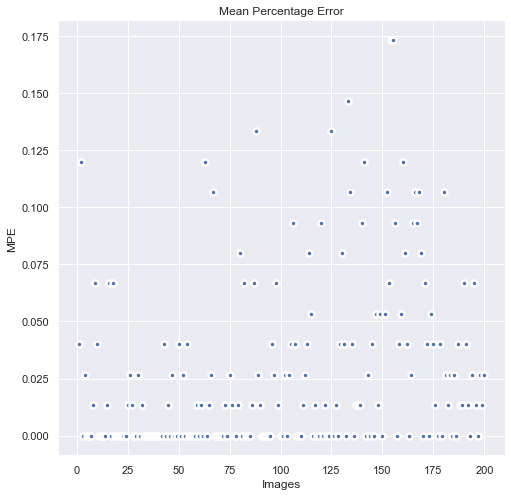

In [141]:
getScatterPlot(metric_df_cancer.MPE, metric_df_cancer, title='Mean Percentage Error', file_name='mpe_scatter')

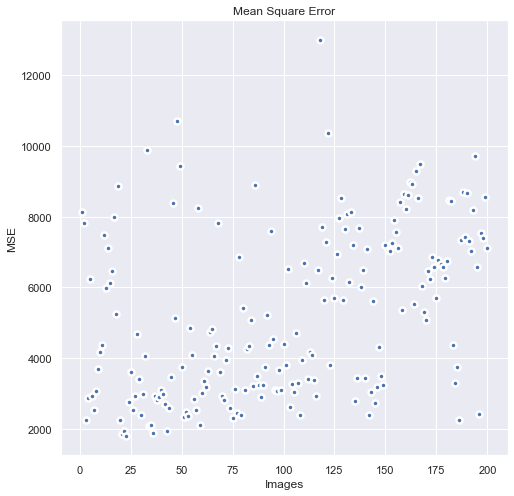

In [142]:
getScatterPlot(metric_df_cancer.MSE, metric_df_cancer, title='Mean Square Error', file_name='mse_scatter')

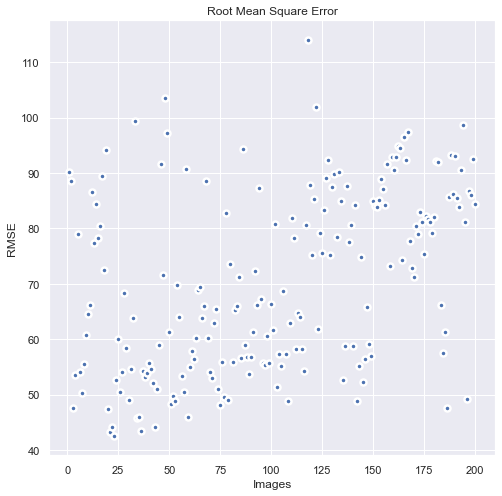

In [143]:
getScatterPlot(metric_df_cancer.RMSE, metric_df_cancer, title='Root Mean Square Error', file_name='rmse_scatter')

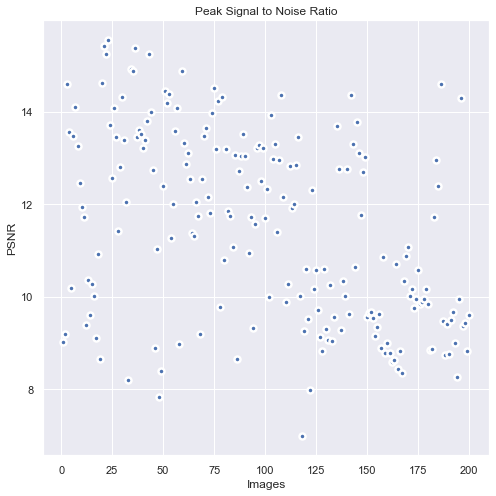

In [144]:
getScatterPlot(metric_df_cancer.PSNR, metric_df_cancer, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

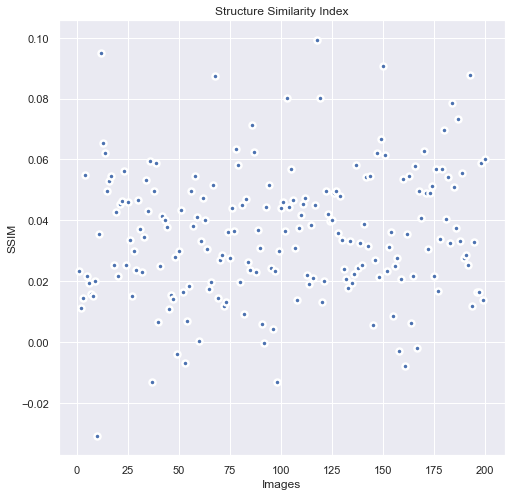

In [145]:
getScatterPlot(metric_df_cancer.SSIM, metric_df_cancer, title='Structure Similarity Index', file_name='ssim_scatter')

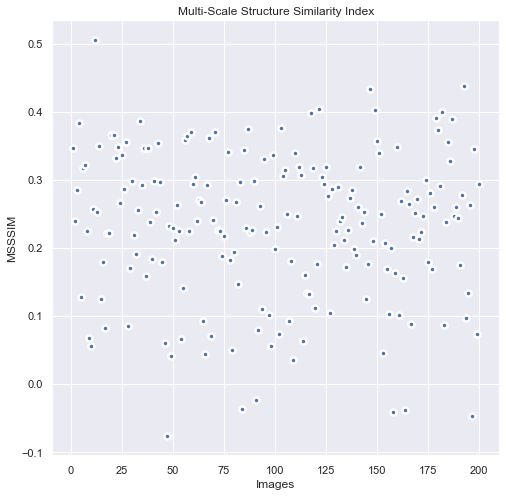

In [146]:
getScatterPlot(metric_df_cancer.MSSSIM, metric_df_cancer, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

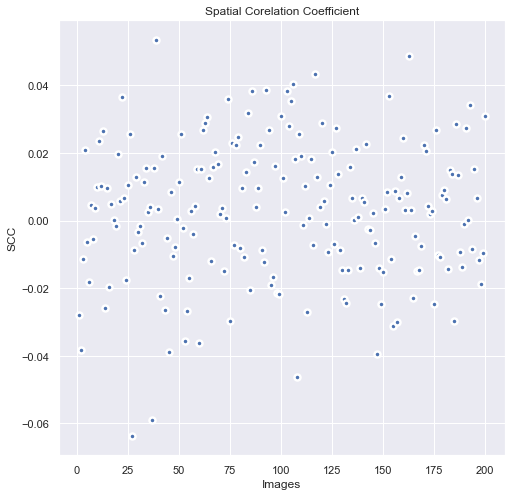

In [147]:
getScatterPlot(metric_df_cancer.SCC, metric_df_cancer, title='Spatial Corelation Coefficient', file_name='scc_scatter')

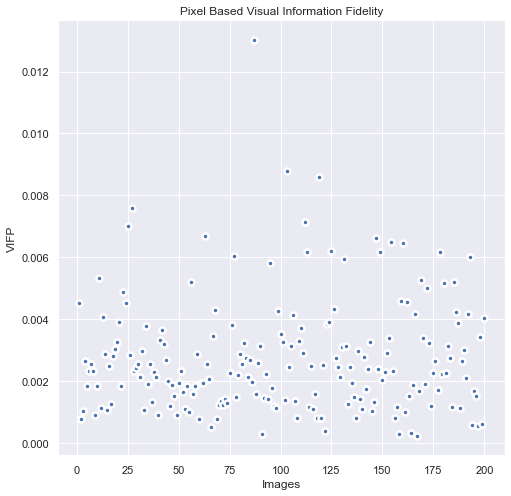

In [148]:
getScatterPlot(metric_df_cancer.VIFP, metric_df_cancer, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

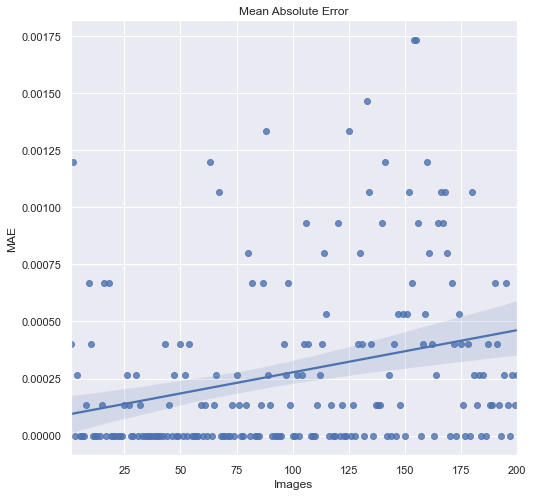

In [149]:
RegPlot(metric_df_cancer.MAE, metric_df_cancer, 'Mean Absolute Error', 'mae_scatter')

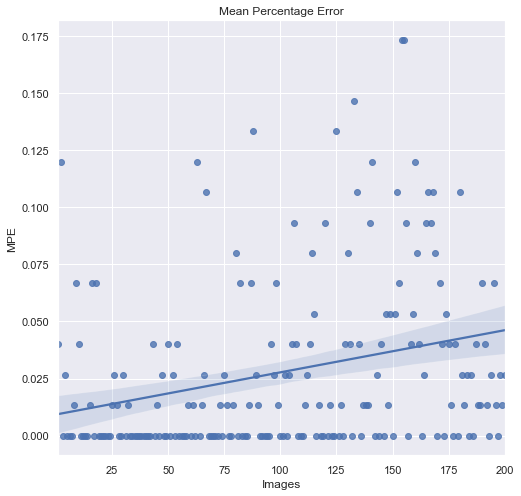

In [150]:
RegPlot(metric_df_cancer.MPE, metric_df_cancer, title='Mean Percentage Error', file_name='mpe_scatter')

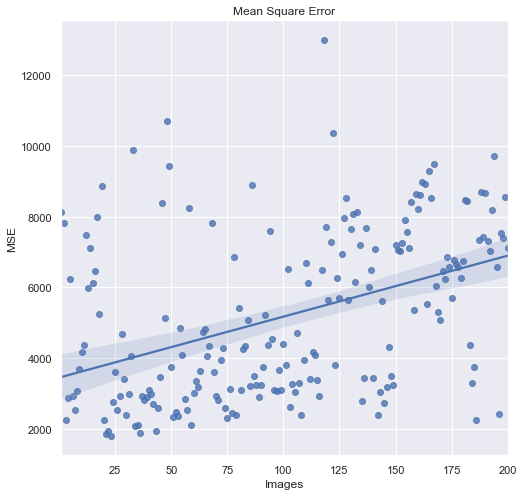

In [151]:
RegPlot(metric_df_cancer.MSE, metric_df_cancer, title='Mean Square Error', file_name='mse_scatter')

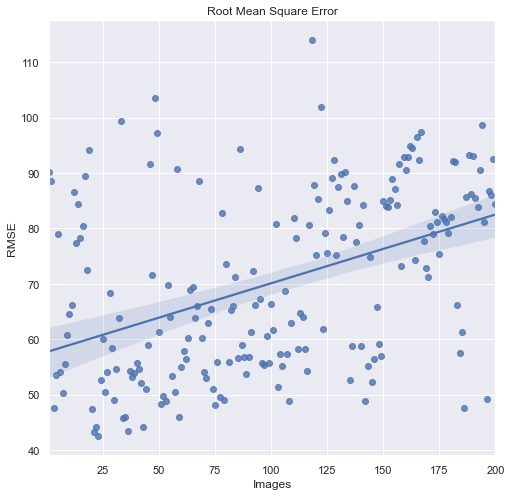

In [152]:
RegPlot(metric_df_cancer.RMSE, metric_df_cancer, title='Root Mean Square Error', file_name='rmse_scatter')

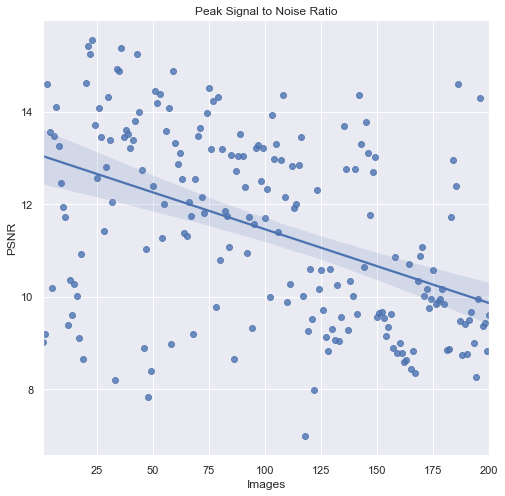

In [153]:
RegPlot(metric_df_cancer.PSNR, metric_df_cancer, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

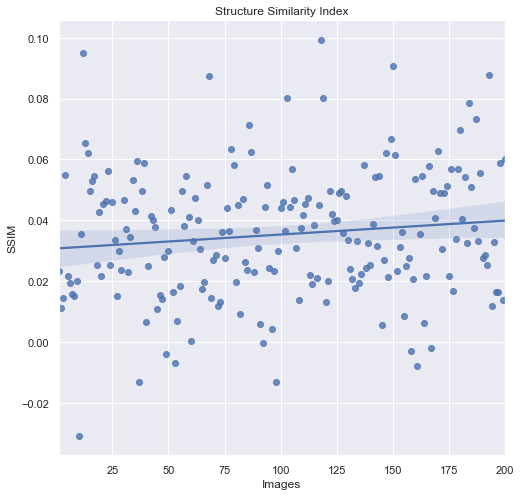

In [154]:
RegPlot(metric_df_cancer.SSIM, metric_df_cancer, title='Structure Similarity Index', file_name='ssim_scatter')

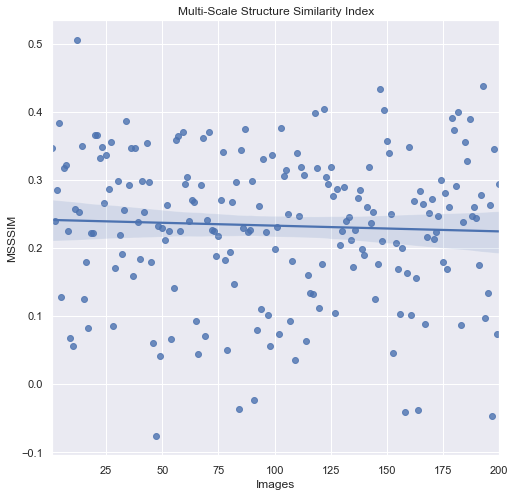

In [155]:
RegPlot(metric_df_cancer.MSSSIM, metric_df_cancer, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

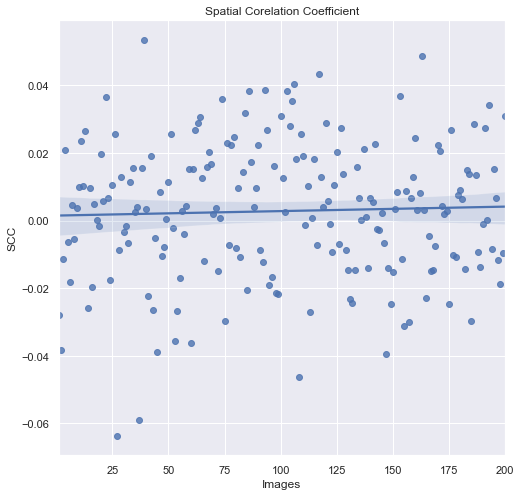

In [156]:
RegPlot(metric_df_cancer.SCC, metric_df_cancer, title='Spatial Corelation Coefficient', file_name='scc_scatter')

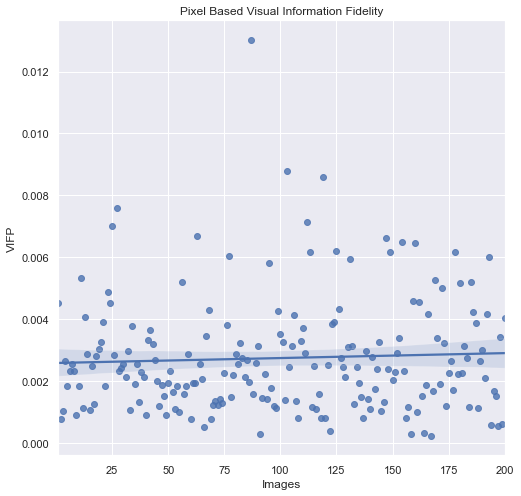

In [157]:
RegPlot(metric_df_cancer.VIFP, metric_df_cancer, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')